<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(0_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.4_n20.csv',
 'data_multi_delta_0.4_n30.csv',
 'data_multi_delta_0.4_n60.csv',
 'data_multi_delta_0.4_n120.csv',
 'data_multi_delta_0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,83.410945,24.492014,-0.014012,117.888947,117.990430,-0.101482
1,0.0,1.0,66.821498,39.204519,3.956257,119.982275,116.089473,3.892802
2,0.0,2.0,45.068901,96.760625,2.459584,154.289110,151.876406,2.412704
3,0.0,3.0,22.838631,34.297806,-3.698267,63.438170,67.119108,-3.680938
4,0.0,4.0,71.858518,53.056339,-2.904867,132.009990,134.992744,-2.982754
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,21.786015,41.374401,-1.634547,71.525869,72.892894,-1.367026
249996,999.0,246.0,27.092472,26.036010,-1.578519,61.549964,62.831134,-1.281171
249997,999.0,247.0,62.112342,64.814662,1.856594,138.783598,136.956388,1.827210
249998,999.0,248.0,51.477016,87.435309,0.848469,149.760794,148.971119,0.789675


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,83.410945,24.492014,-0.014012,117.888947,117.990430,-0.101482
1,0.0,1.0,66.821498,39.204519,3.956257,119.982275,116.089473,3.892802
2,0.0,2.0,45.068901,96.760625,2.459584,154.289110,151.876406,2.412704
3,0.0,3.0,22.838631,34.297806,-3.698267,63.438170,67.119108,-3.680938
4,0.0,4.0,71.858518,53.056339,-2.904867,132.009990,134.992744,-2.982754
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,21.786015,41.374401,-1.634547,71.525869,72.892894,-1.367026
249996,999.0,246.0,27.092472,26.036010,-1.578519,61.549964,62.831134,-1.281171
249997,999.0,247.0,62.112342,64.814662,1.856594,138.783598,136.956388,1.827210
249998,999.0,248.0,51.477016,87.435309,0.848469,149.760794,148.971119,0.789675


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    83.410945  24.492014 -0.014012  117.888947  117.990430 -0.101482
      1.0    66.821498  39.204519  3.956257  119.982275  116.089473  3.892802
      2.0    45.068901  96.760625  2.459584  154.289110  151.876406  2.412704
      3.0    22.838631  34.297806 -3.698267   63.438170   67.119108 -3.680938
      4.0    71.858518  53.056339 -2.904867  132.009990  134.992744 -2.982754
...                ...        ...       ...         ...         ...       ...
999.0 245.0  21.786015  41.374401 -1.634547   71.525869   72.892894 -1.367026
      246.0  27.092472  26.036010 -1.578519   61.549964   62.831134 -1.281171
      247.0  62.112342  64.814662  1.856594  138.783598  136.956388  1.827210
      248.0  51.477016  87.435309  0.848469  149.760794  148.971119  0.789675
      249.0  62.292182  91.530973 -4.191591  159.631564  163.953383 -4.321820

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    83.410945  24.492014 -0.014012  117.888947  117.990430 -0.101482
      1.0    66.821498  39.204519  3.956257  119.982275  116.089473  3.892802
      2.0    45.068901  96.760625  2.459584  154.289110  151.876406  2.412704
      3.0    22.838631  34.297806 -3.698267   63.438170   67.119108 -3.680938
      4.0    71.858518  53.056339 -2.904867  132.009990  134.992744 -2.982754
...                ...        ...       ...         ...         ...       ...
999.0 245.0  21.786015  41.374401 -1.634547   71.525869   72.892894 -1.367026
      246.0  27.092472  26.036010 -1.578519   61.549964   62.831134 -1.281171
      247.0  62.112342  64.814662  1.856594  138.783598  136.956388  1.827210
      248.0  51.477016  87.435309  0.848469  149.760794  148.971119  0.789675
      249.0  62.292182  91.530973 -4.191591  159.631564  163.953383 -4.321820

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,83.410945,24.492014,-0.014012,117.888947,117.990430,-0.101482
1,0.0,1.0,66.821498,39.204519,3.956257,119.982275,116.089473,3.892802
2,0.0,2.0,45.068901,96.760625,2.459584,154.289110,151.876406,2.412704
3,0.0,3.0,22.838631,34.297806,-3.698267,63.438170,67.119108,-3.680938
4,0.0,4.0,71.858518,53.056339,-2.904867,132.009990,134.992744,-2.982754
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,21.786015,41.374401,-1.634547,71.525869,72.892894,-1.367026
249996,999.0,246.0,27.092472,26.036010,-1.578519,61.549964,62.831134,-1.281171
249997,999.0,247.0,62.112342,64.814662,1.856594,138.783598,136.956388,1.827210
249998,999.0,248.0,51.477016,87.435309,0.848469,149.760794,148.971119,0.789675


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    83.410945  24.492014 -0.014012  117.888947  117.990430 -0.101482
      1.0    66.821498  39.204519  3.956257  119.982275  116.089473  3.892802
      2.0    45.068901  96.760625  2.459584  154.289110  151.876406  2.412704
      3.0    22.838631  34.297806 -3.698267   63.438170   67.119108 -3.680938
      4.0    71.858518  53.056339 -2.904867  132.009990  134.992744 -2.982754
...                ...        ...       ...         ...         ...       ...
999.0 245.0  21.786015  41.374401 -1.634547   71.525869   72.892894 -1.367026
      246.0  27.092472  26.036010 -1.578519   61.549964   62.831134 -1.281171
      247.0  62.112342  64.814662  1.856594  138.783598  136.956388  1.827210
      248.0  51.477016  87.435309  0.848469  149.760794  148.971119  0.789675
      249.0  62.292182  91.530973 -4.191591  159.631564  163.953383 -4.321820

[250000 rows x 6 columns]

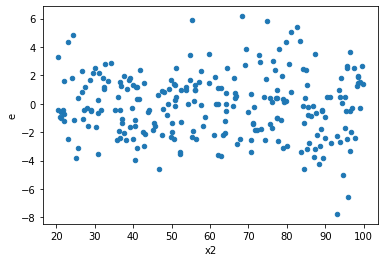

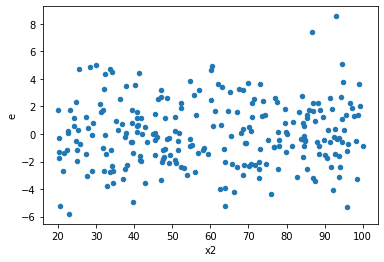

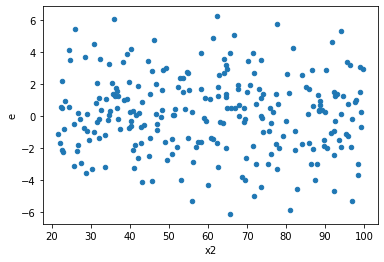

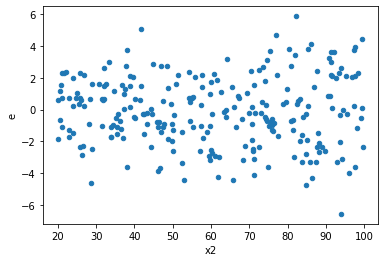

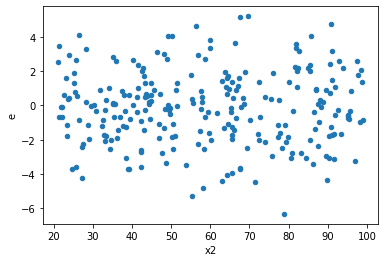

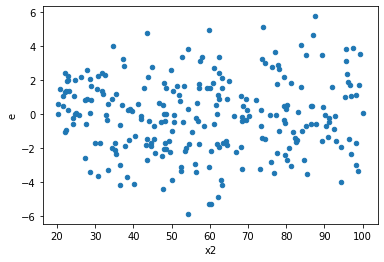

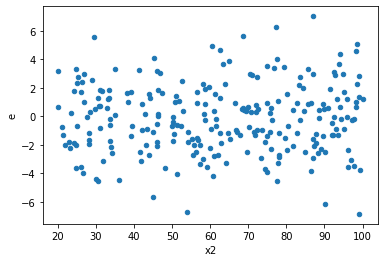

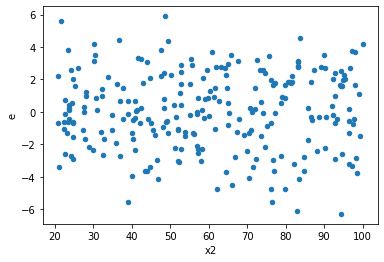

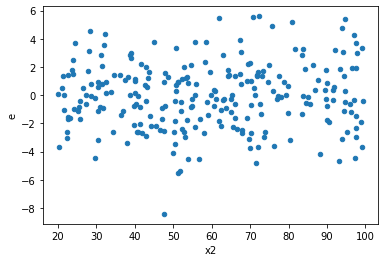

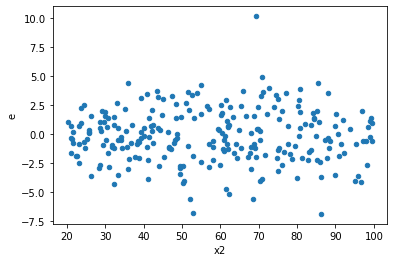

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,98.0,98.0,391.41833710009774,642.5233922613727,3.9940646642867117,6.556361145524211,1.6415260384110713,0.014906032148414239,0.9925469839257929,0.007453016074207119,Reject005=0 : Heteroscedasticity
4.0,98.0,98.0,377.02153119632976,469.77978985655415,3.847158481595202,4.793671325066879,1.2460290752252066,0.277969311025267,0.8610153444873665,0.1389846555126335,Reject005=1 : Homoscedasticity
5.0,98.0,98.0,423.43301601306206,447.702025663315,4.320745061357776,4.568388016972602,1.0573148732679463,0.7832075294448275,0.6083962352775862,0.39160376472241376,Reject005=1 : Homoscedasticity
7.0,98.0,98.0,454.0669990911394,541.3800874186237,4.63333672541979,5.5242866063124865,1.192291200422515,0.3855198013317058,0.8072400993341471,0.1927599006658529,Reject005=1 : Homoscedasticity
8.0,98.0,98.0,410.56748380733336,611.40710779506,4.189464120482993,6.238848038725102,1.4891756700391172,0.05003572907892995,0.974982135460535,0.025017864539464973,Reject005=1 : Homoscedasticity
9.0,98.0,98.0,403.1990608239577,589.7192833846711,4.1142761308567115,6.017543708006849,1.4626008358738483,0.0612639131088859,0.969368043445557,0.03063195655444295,Reject005=1 : Homoscedasticity
10.0,98.0,98.0,365.8274608392197,556.7316511178041,3.732933273869589,5.680935215487796,1.5218421543332044,0.03885795949146931,0.9805710202542653,0.019428979745734654,Reject005=0 : Heteroscedasticity
12.0,98.0,98.0,476.4046055685714,653.7772035177534,4.861271485393586,6.67119595426279,1.3723150361602703,0.11891000740458502,0.9405449962977075,0.05945500370229251,Reject005=1 : Homoscedasticity
13.0,98.0,98.0,365.3121986626908,485.3551265551039,3.727675496558069,4.952603332194937,1.3286036664854275,0.16138196671015592,0.919309016644922,0.08069098335507796,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,436.6316833218216,384.22949792774665,4.4554253400185875,3.920709162528027,0.8799853803658778,0.5280413920432333,Reject005=1 : Homoscedasticity
1.0,98.0,98.0,471.63531203727223,422.06887444530025,4.812605224870125,4.3068252494418395,0.8949051601376811,0.5836458013751505,Reject005=1 : Homoscedasticity
2.0,98.0,98.0,502.23787870911093,452.2950354376868,5.124876313358275,4.6152554636498655,0.9005593855250605,0.6051604830357136,Reject005=1 : Homoscedasticity
3.0,98.0,98.0,391.41833710009774,642.5233922613727,3.9940646642867117,6.556361145524211,1.6415260384110713,0.014906032148414239,Reject005=0 : Heteroscedasticity
4.0,98.0,98.0,377.02153119632976,469.77978985655415,3.847158481595202,4.793671325066879,1.2460290752252066,0.277969311025267,Reject005=1 : Homoscedasticity
5.0,98.0,98.0,423.43301601306206,447.702025663315,4.320745061357776,4.568388016972602,1.0573148732679463,0.7832075294448275,Reject005=1 : Homoscedasticity
6.0,98.0,98.0,491.6145991313491,326.16862971843034,5.016475501340297,3.3282513236574522,0.6634640840502886,0.04352962141684989,Reject005=0 : Heteroscedasticity
7.0,98.0,98.0,454.0669990911394,541.3800874186237,4.63333672541979,5.5242866063124865,1.192291200422515,0.3855198013317058,Reject005=1 : Homoscedasticity
8.0,98.0,98.0,410.56748380733336,611.40710779506,4.189464120482993,6.238848038725102,1.4891756700391172,0.05003572907892995,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      776
Reject005=0 : Heteroscedasticity    224
Name: Result_test, dtype: int64